import os
import sys
import glob
import numpy as np
from skimage import io
#from sklearn import datasets
from sklearn import utils
import cv2
 
IMAGE_SIZE = 40
#COLOR_BYTE = 3
COLOR_BYTE = 1
CATEGORY_NUM = 6
threshhold = 80
 
## ラベル名(0～)を付けたディレクトリに分類されたイメージファイルを読み込む
## 入力パスはラベル名の上位のディレクトリ
def load_handimage_bin(path):
 
    # ファイル一覧を取得
    files = glob.glob(os.path.join(path, '*/*.png'))
 
    # イメージとラベル領域を確保
    #images = np.ndarray((len(files), IMAGE_SIZE, IMAGE_SIZE,
    #                      COLOR_BYTE), dtype = np.uint8)
    images = np.ndarray((len(files), IMAGE_SIZE, IMAGE_SIZE)
                           , dtype = np.uint8)
 
    labels = np.ndarray(len(files), dtype=np.int)
 
    # イメージとラベルを読み込み
    for idx, file in enumerate(files):
        # イメージ読み込み
        image = io.imread(file)
        #image = cv2.GaussianBlur(image, (3,3), 0) # 必要に応じて、ぼかしでノイズ対策
        retval,image = cv2.threshold(image, threshhold, 255, cv2.THRESH_BINARY)
        images[idx] = image[:,:,0] | image[:,:,1] | image[:,:,2]
 
        # ディレクトリ名よりラベルを取得
        label = os.path.split(os.path.dirname(file))[-1]
        labels[idx] = int(label)
 
    # scikit-learn の他のデータセットの形式に合わせる
    flat_data = images.reshape((-1, IMAGE_SIZE * IMAGE_SIZE * COLOR_BYTE))
    images = flat_data.view()
    #return datasets.base.Bunch(data=images,
    return utils.Bunch(data=images,
                 target=labels.astype(np.int),
                 target_names=np.arange(CATEGORY_NUM),
                 images=images,
                 DESCR=None)
 
if __name__ == '__main__':
    import matplotlib.pyplot as plt

    d = load_handimage_bin("./data/m01")
    plt.figure(figsize=(8, 8))
    # 画像を 2 行 3 列に表示
    k = 0
    for i in range(6):
        for j in range(4):
            img = d.images[d.target==i][j]
            k += 1
            plt.subplot(6,4, k)
            plt.axis('off')
            plt.imshow(img.reshape(40,40), cmap="gray", interpolation='nearest')
            plt.title(i)
    plt.tight_layout()
    plt.show()

In [12]:
import os
import sys
import glob
import numpy as np
import librosa
from skimage import io
#from sklearn import datasets
from sklearn import utils
import cv2
 
IMAGE_SIZE = 40
#COLOR_BYTE = 3
COLOR_BYTE = 1
CATEGORY_NUM = 6
threshhold = 80
 
## ラベル名(0～)を付けたディレクトリに分類されたイメージファイルを読み込む
## 入力パスはラベル名の上位のディレクトリ
def load_wavimage_bin(path):
 
    # ファイル一覧を取得
    files = glob.glob(os.path.join(path, '*/*.'))
 
    # イメージとラベル領域を確保
    #images = np.ndarray((len(files), IMAGE_SIZE, IMAGE_SIZE,
    #                      COLOR_BYTE), dtype = np.uint8)
    images = np.ndarray((len(files))
                           , dtype = np.uint8)
 
    labels = np.ndarray(len(files), dtype=np.int)
 
    # イメージとラベルを読み込み
    for idx, file in enumerate(files):
        # イメージ読み込み
        r,sr = librosa.load(file,sr=16000)
        #image = cv2.GaussianBlur(image, (3,3), 0) # 必要に応じて、ぼかしでノイズ対策
        retval,image = cv2.threshold(image, threshhold, 255, cv2.THRESH_BINARY)
        images[idx] = image[:,:,0] | image[:,:,1] | image[:,:,2]
 
        # ディレクトリ名よりラベルを取得
        label = os.path.split(os.path.dirname(file))[-1]
        labels[idx] = int(label)
 
    # scikit-learn の他のデータセットの形式に合わせる
    flat_data = images.reshape((-1, IMAGE_SIZE * IMAGE_SIZE * COLOR_BYTE))
    images = flat_data.view()
    #return datasets.base.Bunch(data=images,
    return utils.Bunch(data=images,
                 target=labels.astype(np.int),
                 target_names=np.arange(CATEGORY_NUM),
                 images=images,
                 DESCR=None)
 
if __name__ == '__main__':
    import matplotlib.pyplot as plt

    d = load_wavimage_bin("./dataset/fujitou_normal_001.wav")
    plt.figure(figsize=(8, 8))
#     # 画像を 2 行 3 列に表示
#     k = 0
#     for i in range(6):
#         for j in range(4):
#             img = d.images[d.target==i][j]
#             k += 1
#             plt.subplot(6,4, k)
#             plt.axis('off')
#             plt.imshow(img.reshape(40,40), cmap="gray", interpolation='nearest')
#             plt.title(i)
#     plt.tight_layout()
#     plt.show()

<Figure size 576x576 with 0 Axes>

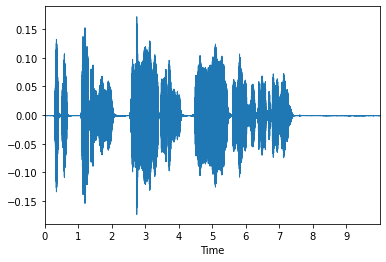

In [38]:
import librosa.display
# Load a flac file from 0(s) to 60(s) and resample to 4.41 KHz
filename = './dataset/fujitou_normal/fujitou_normal_001.wav'
# offset = スタート地点   duration = 終了地点
y, sr = librosa.load(filename, sr=4410, offset=0.0, duration=10.0)
librosa.display.waveplot(y=y, sr=sr)

[[2.3165120e-07 1.7297962e-05 6.3522214e-07 ... 1.0141994e-07
  3.0373087e-08 6.8732120e-08]
 [6.1876585e-06 2.2757870e-04 1.9087911e-05 ... 2.5348997e-06
  1.3608637e-06 6.1251271e-06]
 [2.4223812e-06 2.2384804e-03 1.1566563e-04 ... 7.4507579e-06
  2.1981118e-06 4.7277986e-06]
 ...
 [4.3505907e-10 1.5222217e-03 6.2194940e-06 ... 1.9634339e-09
  1.6398184e-09 6.0686384e-10]
 [5.0888421e-10 9.3305898e-05 1.6186166e-06 ... 2.7376035e-10
  2.7939320e-10 1.3269659e-10]
 [2.4606714e-10 2.8400179e-06 8.2730438e-08 ... 1.3808093e-11
  1.4053374e-11 9.4753641e-12]]
[[-80.       -64.40101  -78.7517   ... -80.       -80.       -80.      ]
 [-68.86569  -53.20964  -63.973373 ... -72.74135  -75.44281  -68.909805]
 [-72.93853  -43.281425 -56.14892  ... -68.05895  -73.360466 -70.03437 ]
 ...
 [-80.       -44.956177 -68.84341  ... -80.       -80.       -80.      ]
 [-80.       -57.081863 -74.689514 ... -80.       -80.       -80.      ]
 [-80.       -72.24775  -80.       ... -80.       -80.       -80. 

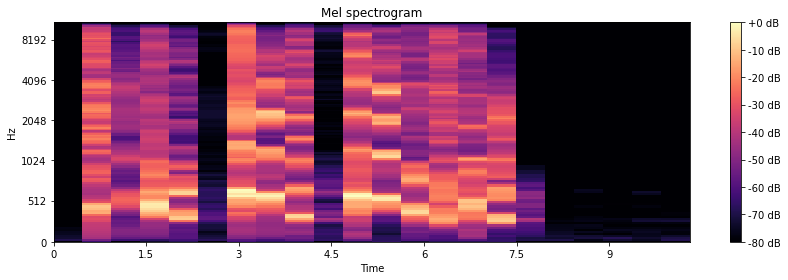

In [39]:
# n_mels is number of Mel bands to generate
n_mels=128
# hop_length is number of samples between successive frames.
hop_length=2068
# n_fft is length of the FFT window
n_fft=2048
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)

log_S = librosa.power_to_db(S, np.max)
print(S)
print(log_S)
print(log_S.shape)

plt.figure(figsize=(12, 4))
librosa.display.specshow(data=S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
librosa.display.specshow(data=log_S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [1]:
# Load
y, sr = librosa.load(audio_path,sr=16000)


NameError: name 'librosa' is not defined

In [19]:
import librosa
import glob
import numpy as np

In [20]:
def extract_mel(wav, sr, n_mels=64): #Output -> (timeframe, mel_dim)
    audio, _ = librosa.load(wav, sr=sr)
    mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels).T
    return mel

In [30]:
def data_list(path, sr, n_mels=64):
    wav_list = glob.glob(os.path.join(path, '*/*/*'))
    size = len(wav_list)
    data = np.ones((1, n_mels))
    count= 0
    for wavname in wav_list:
        component = extract_mel(wavname, sr=sr, n_mels=64)
        data = np.concatenate([data, component], axis=0)
        count += 1
        sys.stdout.write("\r%s" % "現在"+str(np.around((count/len(wav_list))*100 , 2))+"%完了")
        sys.stdout.flush()
    return data[1:], size

In [35]:
from pydub import AudioSegment


ModuleNotFoundError: No module named 'pydub'